In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [5]:
a = [4.4, 3.8, 4.8, 4.0, 3.4, 4.2, 5.2]
a_n = np.array(a)
a_n.var()

0.31673469387755115

In [6]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [7]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [9]:
voice_data.isnull().sum().sum()

0

In [28]:
X = voice_data.drop('label', axis=1)
y = voice_data[['label']]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


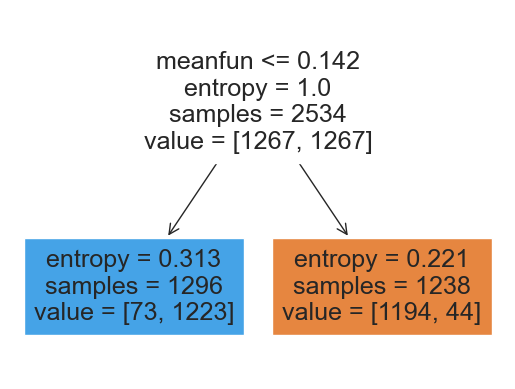

In [42]:
dt_1 = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
dt_1.fit(X_train, y_train)
tree.plot_tree(dt_1, feature_names=list(X_train.columns), filled=True);

In [34]:
print(f"{metrics.accuracy_score(y_test, dt_1.predict(X_test)):.3f}")

0.956


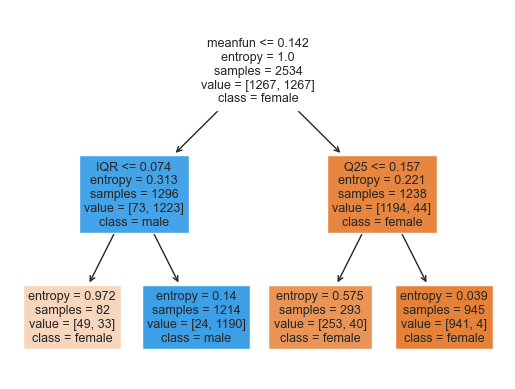

In [43]:
dt_2 = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
dt_2.fit(X_train, y_train)
tree.plot_tree(dt_2, feature_names=list(X_train.columns), filled=True,
               class_names=dt_2.classes_.tolist());

In [44]:
print(f"{metrics.accuracy_score(y_test, dt_2.predict(X_test)):.3f}")

0.962


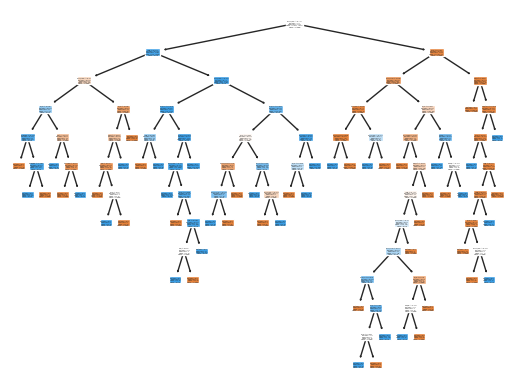

In [45]:
dt_free = tree.DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=0)
dt_free.fit(X_train, y_train)
tree.plot_tree(dt_free, feature_names=list(X_train.columns), filled=True,
               class_names=dt_free.classes_.tolist());

In [56]:
print(f"Depth: {dt_free.get_depth()}; n_leafs: {dt_free.get_n_leaves()}")
print(f"train score: {metrics.accuracy_score(y_train, dt_free.predict(X_train)):.3f}")
print(f"test score: {metrics.accuracy_score(y_test, dt_free.predict(X_test)):.3f}")

Depth: 12; n_leafs: 54
train score: 1.000
test score: 0.973


In [77]:
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}
cv = model_selection.StratifiedKFold(n_splits=5)
gsv = model_selection.GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=0),
                                   param_grid=param_grid,
                                   cv=cv,
                                   scoring='accuracy'
                                   )
gsv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             scoring='accuracy')

In [78]:
gsv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}

In [79]:
print(f"train score {metrics.accuracy_score(y_train, gsv.best_estimator_.predict(X_train)):.3f}")
print(f"test score {metrics.accuracy_score(y_test, gsv.best_estimator_.predict(X_test)):.3f}")

train score 0.996
test score 0.970


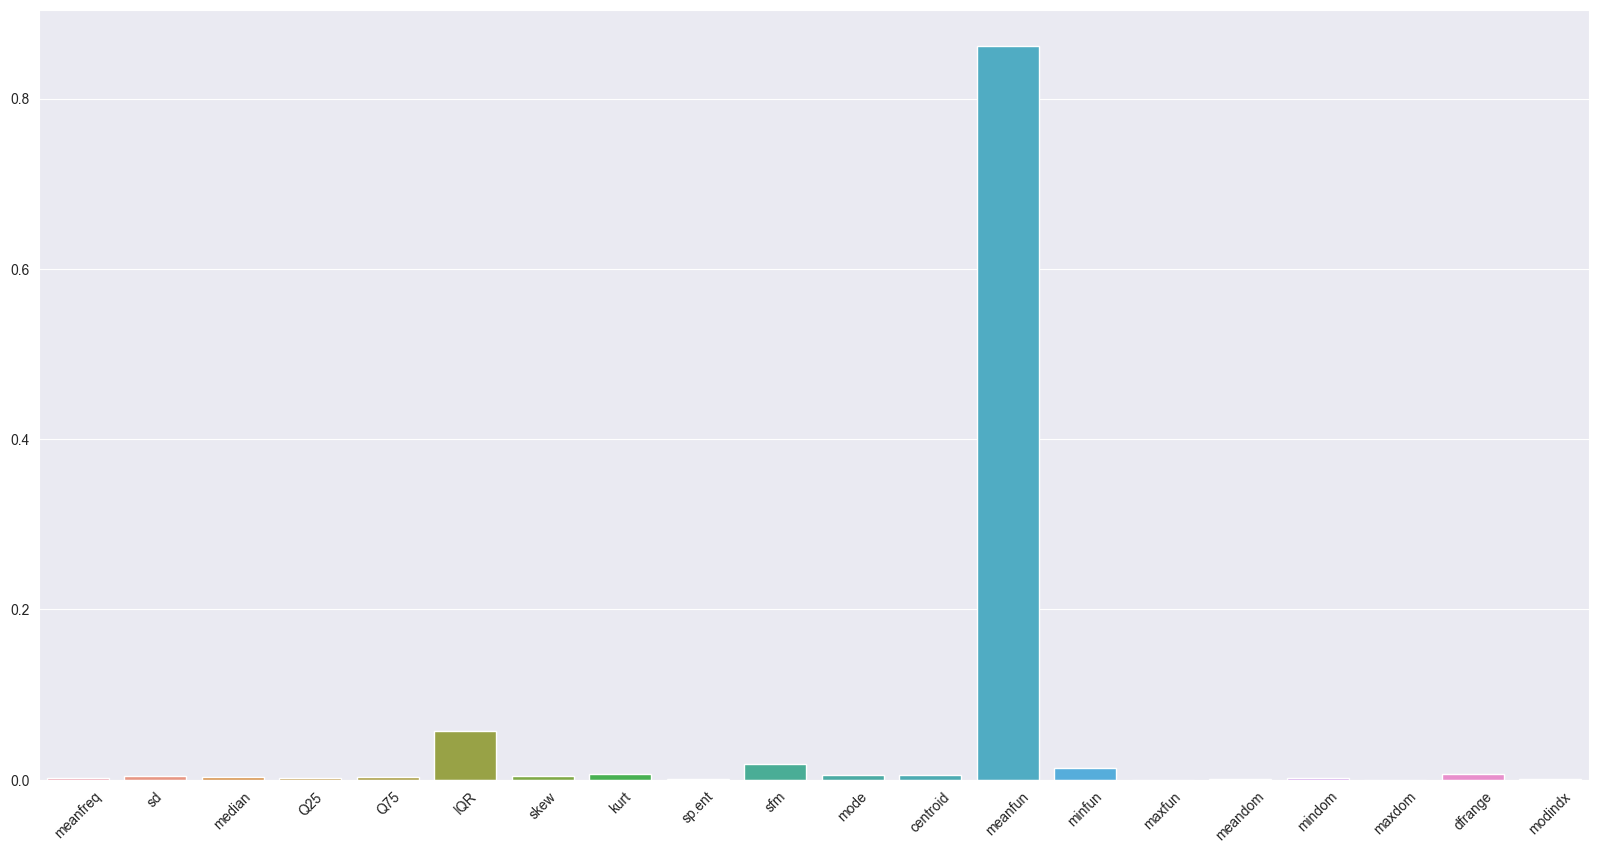

In [95]:
plt.figure(figsize=(20,10))
best_dt = gsv.best_estimator_
sns.barplot(x=best_dt.feature_names_in_, y=best_dt.feature_importances_).xaxis.set_tick_params(rotation=45)

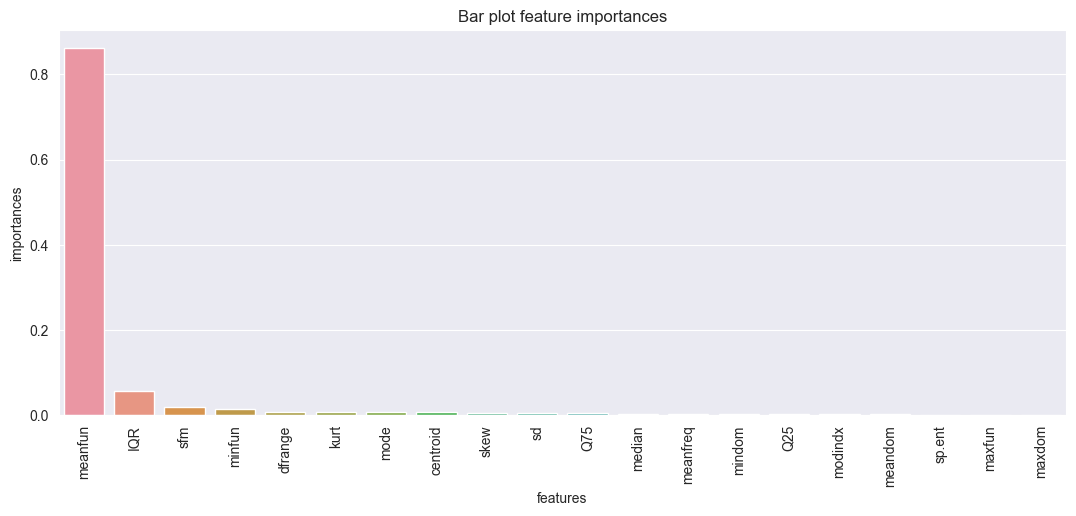

In [92]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
features = X.columns #признаки
feature_importances = best_dt.feature_importances_ #важность признаков
# Создаём DataFrame, содержащий информацию о важности признаков
importances_data = pd.DataFrame({'features': features, 'importances': feature_importances})
importances_data = importances_data.sort_values(by='importances', ascending=False)
# Строим столбчатую диаграмму
sns.barplot(data=importances_data, x='features', y='importances', ax=ax);
# Добавляем подпись к графику и поворот меток на оси абсцисс
ax.set_title('Bar plot feature importances')
ax.xaxis.set_tick_params(rotation=90)